In [1]:
%matplotlib widget
%matplotlib inline
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from sympy import *
import pandas as pd
from causalgraphicalmodels import CausalGraphicalModel

### MERCADO DE BIENES: CONSUMO, INVERSIÓN, DETERMINACIÓN DEL PRODUCTO Y LA POLÍTICA FISCAL

#### 1. Modelo Keynesiano: 

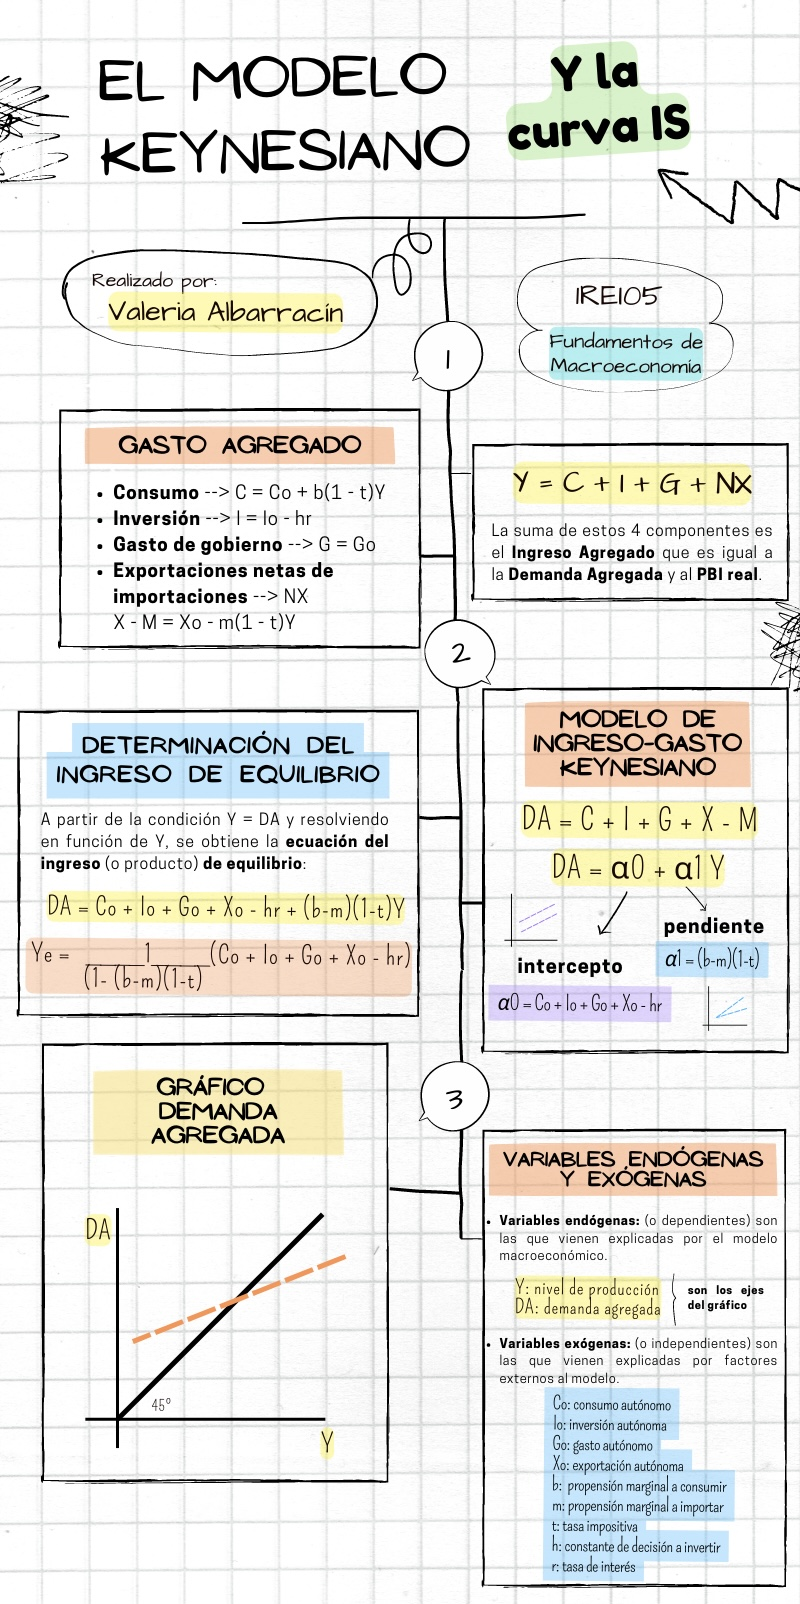

#### 2. El modelo de Ingreso-Gasto Keynesiano:

La ecuación de equilibrio para el Ingreso Agregado se deriva de la condición de equilibrio donde el ingreso es igual a la demanda agregada: $DA = Y$:

$$ DA = C + I + G + X - M $$

Donde:

$$ C = C_0 + bY^d $$
$$ I = I_0 - hr $$
$$ G = G_0 $$
$$ X = X_0 $$
$$ M = mY^d $$

$$ Y^d = 1 - t $$

Entonces: 

$$ DA = C_0 + I_0 + G_0 + X_0 - hr + Y(b - m)(1 - t) $$

De forma corta:

$$ DA = α_0 + α_1Y $$

Donde $ α_0 = (C_0 + I_0 + G_0 + X_0 -hr)$ es el intercepto y $ α_1 = (b - m)(1 - t) $ es la pendiente de la función

Ahora, considerando la condición de equilibrio $Y = DA$, la ecuación del ingreso de equilibrio a corto plazo es:

$$ Y = C_0 + bY^d + I_0 -hr + G_0 + X_0 - mY^d $$

$$ Y = \frac{1}{1 - (b - m)(1 - t)} (C_0 + I_0 + G_0 + X_0 - hr) $$

El ingreso de Equilibrio a corto plazo se grafica de la siguiente forma:

In [22]:
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3
r = 0.9

Y = np.arange(Y_size)

# Ecuación de la curva del ingreso de equilibrio

def DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y):
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    return DA_K

DA_IS_K = DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y)

In [23]:
# Recta de 45°

a = 2.5 

def L_45(a, Y):
    L_45 = a*Y
    return L_45

L_45 = L_45(a, Y)

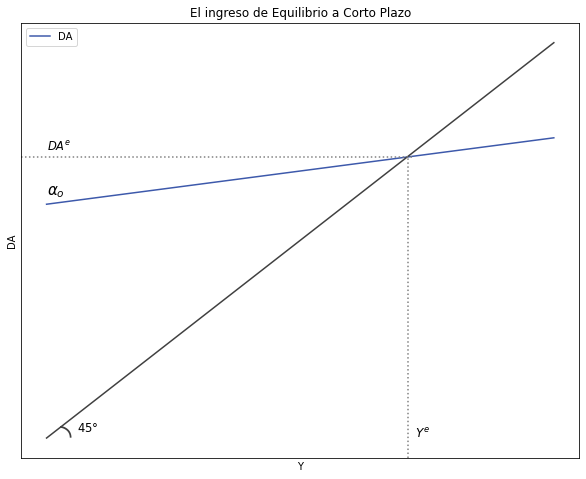

In [48]:
# Gráfico

# Dimensiones del gráfico
y_max = np.max(DA_IS_K)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, DA_IS_K, label = "DA", color = "#3D59AB") #Demanda agregada
ax.plot(Y, L_45, color = "#404040") #Línea de 45º

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Líneas punteadas punto de equilibrio
plt.axvline(x=70.5,  ymin= 0, ymax= 0.69, linestyle = ":", color = "grey")
plt.axhline(y=176, xmin= 0, xmax= 0.7, linestyle = ":", color = "grey")

# Texto agregado
    # punto de equilibrio
plt.text(0, 180, '$DA^e$', fontsize = 11.5, color = 'black')
plt.text(72, 0, '$Y^e$', fontsize = 12, color = 'black')
plt.text(0, 152, '$α_o$', fontsize = 15, color = 'black')
    # línea 45º
plt.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')
plt.text(2.5, -3, '$◝$', fontsize = 30, color = '#404040')

# Título y leyenda
ax.set(title="El ingreso de Equilibrio a Corto Plazo", xlabel= r'Y', ylabel= r'DA')
ax.legend() #mostrar leyenda

plt.show()


In [51]:
# líneas punteadas autómaticas

    # definir la función line_intersection
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

    # coordenadas de las curvas (x,y)
A = [DA_IS_K[0], Y[0]] # DA, coordenada inicio
B = [DA_IS_K[-1], Y[-1]] # DA, coordenada fin

C = [L_45[0], Y[0]] # L_45, coordenada inicio
D = [L_45[-1], Y[-1]] # L_45, coordenada fin

    # creación de intersección

intersec = line_intersection((A, B), (C, D))
intersec

(175.9254807692308, 70.37019230769232)

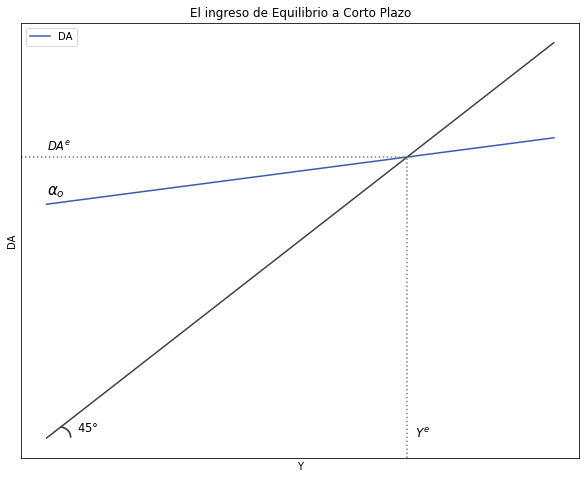

In [52]:
# Gráfico

# Dimensiones del gráfico
y_max = np.max(DA_IS_K)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, DA_IS_K, label = "DA", color = "#3D59AB") #Demanda agregada
ax.plot(Y, L_45, color = "#404040") #Línea de 45º

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Líneas punteadas punto de equilibrio
plt.axhline(y=intersec[0], xmin= 0, xmax= 0.7, linestyle = ":", color = "grey")
plt.axvline(x=intersec[1],  ymin= 0, ymax= 0.69, linestyle = ":", color = "grey")

# Texto agregado
    # punto de equilibrio
plt.text(0, 180, '$DA^e$', fontsize = 11.5, color = 'black')
plt.text(72, 0, '$Y^e$', fontsize = 12, color = 'black')
plt.text(0, 152, '$α_o$', fontsize = 15, color = 'black')
    # línea 45º
plt.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')
plt.text(2.5, -3, '$◝$', fontsize = 30, color = '#404040')

# Título y leyenda
ax.set(title="El ingreso de Equilibrio a Corto Plazo", xlabel= r'Y', ylabel= r'DA')
ax.legend() #mostrar leyenda

plt.show()

#### 2.1. Estática comparativa del modelo de Ingreso-Gasto Keynesiano:

#### - Política Fiscal contractiva con reducción del Gasto del Gobierno $(G_0)$:

In [53]:
#--------------------------------------------------
# Curva de ingreso de equilibrio ORIGINAL

    # Parámetros
Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3
r = 0.9

Y = np.arange(Y_size)

    # Ecuación 
def DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y):
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    return DA_K

DA_IS_K = DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y)


#--------------------------------------------------
# NUEVA curva de ingreso de equilibrio

    # Definir SOLO el parámetro cambiado
Go = 35

# Generar la ecuación con el nuevo parámetro
def DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y):
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    return DA_K

DA_G = DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y)

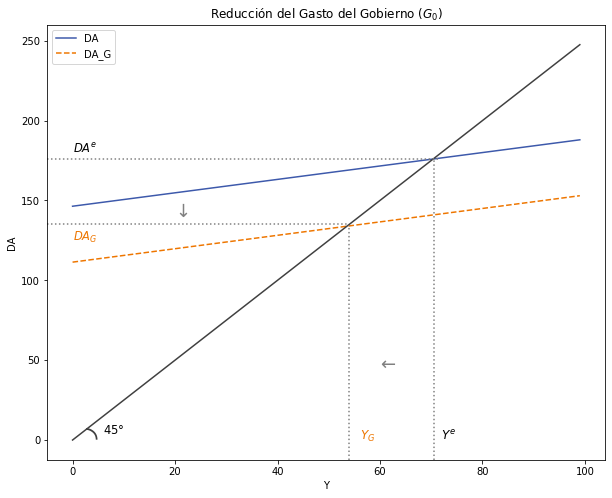

In [54]:
# Gráfico
y_max = np.max(DA_IS_K)
fig, ax = plt.subplots(figsize=(10, 8))


# Curvas a graficar
ax.plot(Y, DA_IS_K, label = "DA", color = "#3D59AB") #curva ORIGINAL
ax.plot(Y, DA_G, label = "DA_G", color = "#EE7600", linestyle = 'dashed') #NUEVA curva
ax.plot(Y, L_45, color = "#404040") #línea de 45º

# Lineas punteadas
plt.axvline(x = 70.5, ymin= 0, ymax = 0.69, linestyle = ":", color = "grey")
plt.axhline(y = 176, xmin= 0, xmax = 0.7, linestyle = ":", color = "grey")
plt.axvline(x = 54,  ymin= 0, ymax = 0.54, linestyle = ":", color = "grey")
plt.axhline(y = 135, xmin= 0, xmax = 0.54, linestyle = ":", color = "grey")

# Texto agregado
plt.text(0, 180, '$DA^e$', fontsize = 11.5, color = 'black')
plt.text(0, 125, '$DA_G$', fontsize = 11.5, color = '#EE7600')
plt.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')
plt.text(2.5, -3, '$◝$', fontsize = 30, color = '#404040')
plt.text(72, 0, '$Y^e$', fontsize = 12, color = 'black')
plt.text(56, 0, '$Y_G$', fontsize = 12, color = '#EE7600')
plt.text(60, 45, '$←$', fontsize = 18, color = 'grey')
plt.text(20, 140, '$↓$', fontsize = 18, color = 'grey')

# Título y leyenda
ax.set(title = "Reducción del Gasto del Gobierno $(G_0)$", xlabel = r'Y', ylabel = r'DA')
ax.legend()

plt.show()


In [55]:
# Gráfico con movimiento

    # Parámetros
Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3
r = 0.9

Y = np.arange(Y_size)

    # Definir ecuación y gráfico para el parámetro específico
def DA_K(Go): # ecuación
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    
    # gráfico
    plt.subplots(figsize=(10, 8))
    plt.plot(Y, DA_K, label = "DA", color = "#3D59AB") #Demanda agregada
    plt.plot(Y, L_45, color = "#404040")
    plt.title('Gasto de Gobierno')
    plt.legend()    
    
    # crear gráfico con movimiento/control
Go_slide = widgets.FloatSlider(value = 70, min = 0, max = 110)  #widgets.FloatSlider(valor_inicial, min, max)
widgets.interact(DA_K, Go = Go_slide) #widgets.interact(nombre_función, parámetro = parámetro:_con_mov)


interactive(children=(FloatSlider(value=70.0, description='Go', max=110.0), Output()), _dom_classes=('widget-i…

<function __main__.DA_K(Go)>

- Intuición: 

$$ ↓Go → ↓DA → DA > Y → ↓Y $$

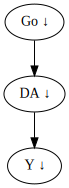

In [56]:
# Gráfico de causalidad

sprinkler = CausalGraphicalModel(nodes=["Go ↓","DA ↓","Y ↓"],
                                 edges=[("Go ↓","DA ↓"), ("DA ↓","Y ↓")])
sprinkler.draw()


- Matemáticamente: $∆G_0 < 0  →  ¿∆Y?$

$$ Y = \frac{1}{1 - (b - m)(1 - t)} (C_0 + I_0 + G_0 + X_0 - hr) $$

$$ ∆Y = \frac{1}{1 - (b - m)(1 - t)} (∆C_0 + ∆I_0 + ∆G_0 + ∆X_0 - ∆hr) $$

Pero, si no ha habido cambios en $C_0$, $I_0$, $X_0$, $h$ ni $r$, entonces: 

$$∆C_0 = ∆I_0 = ∆X_0 = ∆h = ∆r > 0$$

$$ ∆Y = \frac{1}{1 - (b - m)(1 - t)} (∆G_0) $$

$$ \frac{∆Y}{∆G_0}= \frac{1}{1 - (b - m)(1 - t)} $$

Sabiendo que $∆G_0$, la división de cualquier número negativo entre un positivo dará otro negativo:

$$ \frac{∆Y}{(-)}= \frac{1}{1 - (b - m)(1 - t)} < 0 $$

$$ ∆Y < 0 $$

In [58]:
# Diferenciales

    # nombrar variables como símbolos
Co, Io, Go, Xo, h, r, b, m, t = symbols('Co Io Go Xo h r b m t')

    # determinar ecuación
f = (Co + Io + Go + Xo - h*r)/(1-(b-m)*(1-t))

    # función diferencial
df_Go = diff(f, Go) # diff(función, variable_analizar
)
df_Go #∆Y/∆Go

1/(-(1 - t)*(b - m) + 1)

#### - Política fiscal expansiva con una reducción de la Tasa de Tributación $(t)$:

In [9]:
#--------------------------------------------------
# Curva de ingreso de equilibrio ORIGINAL

    # Parámetros
Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3 #tasa de tributación
r = 0.9

Y = np.arange(Y_size)

    # Ecuación 
def DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y):
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    return DA_K

DA_IS_K = DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y)


#--------------------------------------------------
# NUEVA curva de ingreso de equilibrio

    # Definir SOLO el parámetro cambiado
t = 0.01

# Generar la ecuación con el nuevo parámetros
def DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y):
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    return DA_K

DA_t = DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y)

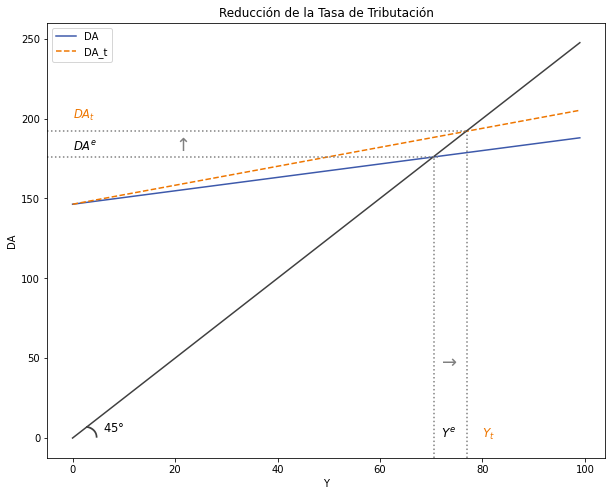

In [10]:
# Gráfico
y_max = np.max(DA_IS_K)
fig, ax = plt.subplots(figsize=(10, 8))


# Curvas a graficar
ax.plot(Y, DA_IS_K, label = "DA", color = "#3D59AB") #curva ORIGINAL
ax.plot(Y, DA_t, label = "DA_t", color = "#EE7600", linestyle = 'dashed') #NUEVA curva
ax.plot(Y, L_45, color = "#404040") #línea de 45º

# Lineas punteadas
plt.axvline(x = 70.5, ymin= 0, ymax = 0.69, linestyle = ":", color = "grey")
plt.axhline(y = 176, xmin= 0, xmax = 0.7, linestyle = ":", color = "grey")
plt.axvline(x = 77,  ymin= 0, ymax = 0.75, linestyle = ":", color = "grey")
plt.axhline(y = 192, xmin= 0, xmax = 0.75, linestyle = ":", color = "grey")

# Texto agregado
plt.text(0, 180, '$DA^e$', fontsize = 11.5, color = 'black')
plt.text(0, 200, '$DA_t$', fontsize = 11.5, color = '#EE7600')
plt.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')
plt.text(2.5, -3, '$◝$', fontsize = 30, color = '#404040')
plt.text(72, 0, '$Y^e$', fontsize = 12, color = 'black')
plt.text(80, 0, '$Y_t$', fontsize = 12, color = '#EE7600')
plt.text(72, 45, '$→$', fontsize = 18, color = 'grey')
plt.text(20, 180, '$↑$', fontsize = 18, color = 'grey')

# Título y leyenda
ax.set(title = "Reducción de la Tasa de Tributación", xlabel = r'Y', ylabel = r'DA')
ax.legend()

plt.show()

In [59]:
# Gráfico con movimiento

    # Parámetros
Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3
r = 0.9

Y = np.arange(Y_size)

    # Definir ecuación y gráfico para el parámetro específico
def DA_K(t): # ecuación
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    
    # gráfico
    plt.subplots(figsize=(10, 8))
    plt.plot(Y, DA_K, label = "DA", color = "#3D59AB") #Demanda agregada
    plt.plot(Y, L_45, color = "#404040")
    plt.title('Tasa de Tributación')
    plt.legend()    
    
    # crear gráfico con movimiento/control
t_slide = widgets.FloatSlider(value = 0.5, min = 0, max = 3)  #widgets.FloatSlider(valor_inicial, min, max)
widgets.interact(DA_K, t = t_slide) #widgets.interact(nombre_función, parámetro = parámetro:_con_mov)


interactive(children=(FloatSlider(value=0.5, description='t', max=3.0), Output()), _dom_classes=('widget-inter…

<function __main__.DA_K(t)>

- Intuición: ¿contradicción?

$$ t↓ → Co↑ → DA↑ → DA > Y → Y↑ $$
$$ t↓ → M↑ → DA↓ → DA < Y → Y↓ $$


- Matemáticamente: $∆t < 0  →  ¿∆Y?$

In [57]:
Co, Io, Go, Xo, h, r, b, m, t = symbols('Co Io Go Xo h r b m t')

f = (Co + Io + Go + Xo - h*r)/(1-(b-m)*(1-t))


df_t = diff(f, t)
df_t #∆Y/∆t

(-b + m)*(Co + Go + Io + Xo - h*r)/(-(1 - t)*(b - m) + 1)**2

-----------